<a href="https://colab.research.google.com/github/RonaldManoelScientist/Previsao_de_Preco_de_casa/blob/main/%5BCompleto%5D_Previs%C3%A3o_de_Pre%C3%A7o_de_casa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Previsão de Preço de Casa
Uma forma muito interessante de se trabalhar a regressão linear é utilizar para a previsão de preços. Basicamente utilizamos a correlação de duas ou mais variaveis para treinarmos o modelo de marchine learning

## Entender o Dataset
> * Vamos buscar entender os dados
> * Saber qual é a dimensão do Dataset
> * Analisar Gráficamente algumas distribuições

In [ ]:
# Logo abaixo iremos fazer a importação de algumas bibliotecas, 
# que nos ajudaram a fazer as analises explorátoria 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

houses = pd.read_csv('/content/drive/MyDrive/DataSet/Portifolio /AmesHousing.csv') # Executamos a importação do dataset

houses.head() # E iremos fazer a visualização das primeiras 5 entradas do dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
houses.columns # Aqui vamos analisar todas as variáveis

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
# Logo abaixo podemos analisar o número de valores ausentes / nulos
houses.isnull().sum() / houses.shape[0]

Order             0.000000
PID               0.000000
MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167235
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 82, dtype: float64

Geralmente nos dataset mais comuns, existem muitos dados ausentes sendo assim exigindo um trabalho maior a ser executado, no entanto como nesse dataset temos apenas a coluna `Lot Frontage` com cerca de 16% dos valores ausentes. E isso ajuda bastante nessa etapa de limpeza dos dados


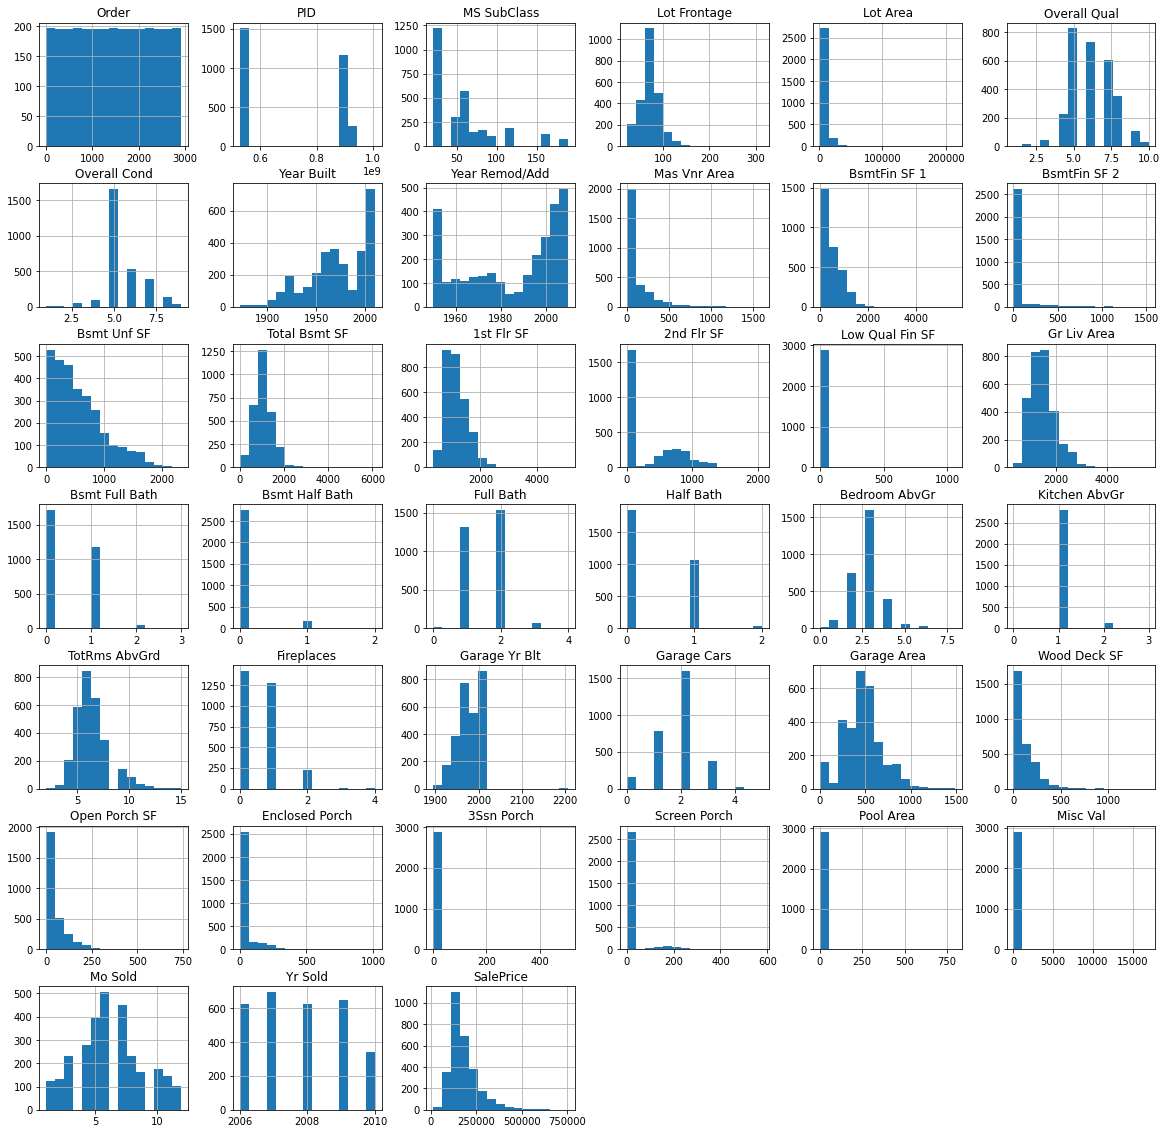

In [ ]:
# Nessa Etapa vamos verificar a distribuição das variáveis disponiveis no dataset
houses.hist(bins=15, figsize=(20,20));

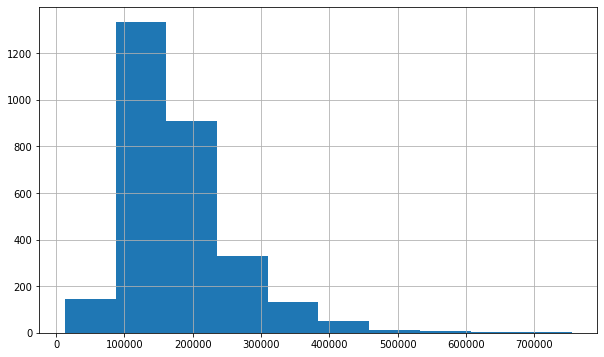

In [ ]:
# Identificamos a variável alvo, onde vamos trabalhar a regressão linear
houses['SalePrice'].hist(bins=10, figsize=(10,6))
sns.set()
plt.tight_layout;

> Antes de comerçamos a etapa de regressão, vamos analisar alguns valores mais a fundo para ajudar a entender mais ainda o dataset


In [ ]:
print(f'A Distribuição de Casas Por Bairros se Encontra:\n{houses.Neighborhood.value_counts()}')

A Distribuição de Casas Por Bairros se Encontra:
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64


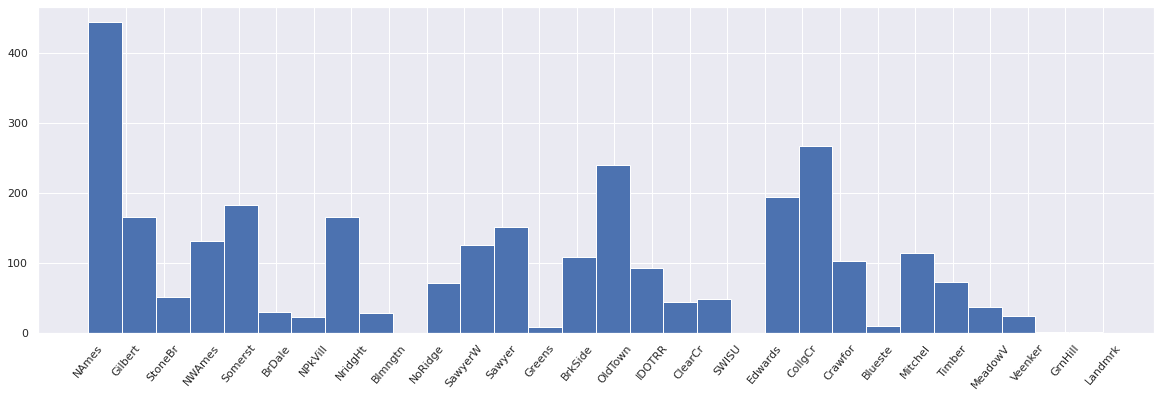

In [ ]:
# Nessa Etapa vamos observar visualmente oque foi apresentado acima
houses['Neighborhood'].hist(bins=30, figsize=(20,6))
sns.set()
plt.xticks(rotation=50);

Realmente existe uma porcentagem de casas bem maior sem localização identificada `NAmes`

## Limpeza dos Dados 
Vamos normalizar o os preços do imoveis fazendo a:


1.   Verificação de Outliers
2.   Tratando de Valores nulos



In [ ]:
# Com esse comando vamos observar alguns valores estartísticos do Variável SalePrice
houses['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

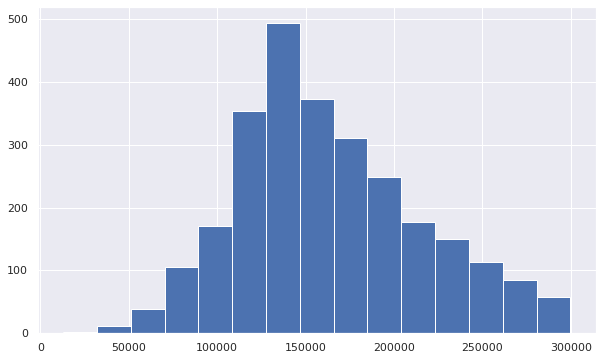

In [ ]:
# Dessa forma com o método Query vamos filtrar  os valores para menores que $300.000
houses = houses.query('SalePrice < 300000')

houses['SalePrice'].hist(bins=15, figsize=(10,6))
plt.tight_layout;

## Verificar Correlação
Como iremos prever o preço do Imovel, vamos selecionar as variaveis que possuem maior correlação com a variavel  *`SalePrice`*

In [ ]:
houses.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

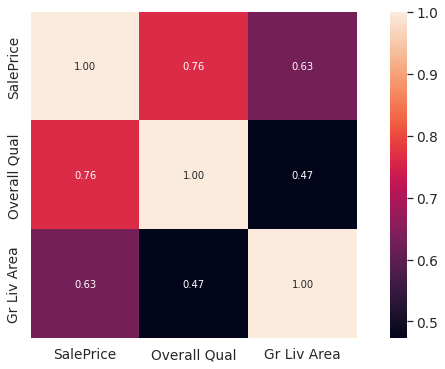

In [ ]:

k= 3 # Número de valores para selecionar

plt.figure(figsize=(12,6)); # Selecionando o tamanho da figura/grafico

corrmat = houses.corr() # Montando a matriz correlação

# Plotando as 3 melhores correlações
cols = corrmat.nlargest(n=k,columns= 'SalePrice')['SalePrice'].index

# Matriz do coeficiente de correlação das variáveis.
matriz_correlacao = np.corrcoef(houses[cols].values.T)


# Montando grafico
sns.set(font_scale=1.25)

hm = sns.heatmap(data = matriz_correlacao, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

Segundo essa analise conseguimos ver uma boa correlação entre `SalePrice` e `Overall Qual`

In [ ]:
np.corrcoef(houses["SalePrice"], houses["Overall Qual"])

array([[1.        , 0.76325343],
       [0.76325343, 1.        ]])

In [ ]:
np.corrcoef(houses["SalePrice"], houses["Gr Liv Area"])

array([[1.        , 0.62943959],
       [0.62943959, 1.        ]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


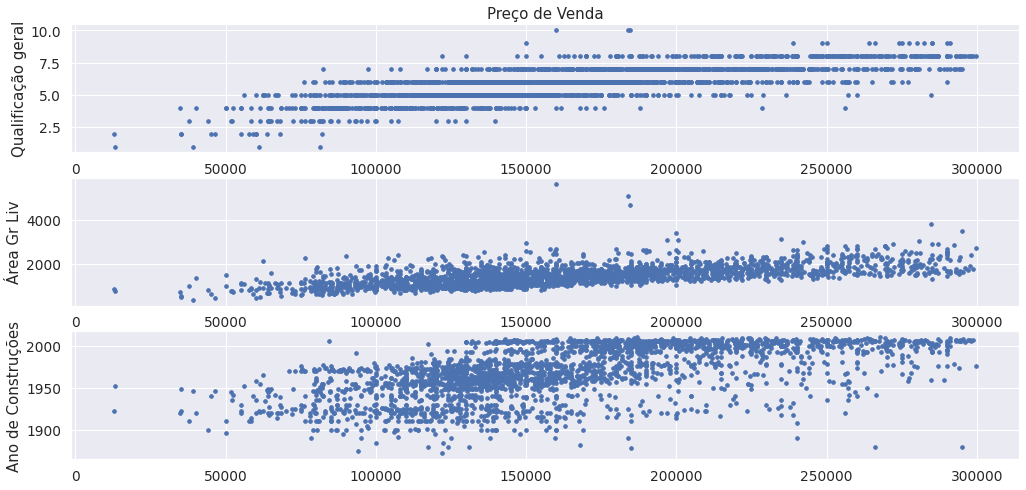

In [ ]:
# Vamos analisar como a Variável se comportar em relação as que tiveram uma correlação mais forte
fig, (ax,ax1,ax2)  = plt.subplots(3, 1, figsize=(17,8))

houses.plot.scatter(x='SalePrice', y='Overall Qual', ax=ax, s=13)
ax.set_title('Preço de Venda')
ax.set_ylabel('Qualificação geral')


houses.plot.scatter(x='SalePrice', y='Gr Liv Area', ax=ax1, s=13)
ax1.set_ylabel('Área Gr Liv')


houses.plot.scatter(x='SalePrice', y='Year Built', ax=ax2, s=13)
ax2.set_ylabel('Ano de Construções')

plt.tight_layout;

> É possivel analisar visualmente que possuem muitos outliers,  e isso afeta diretamente o modelo de regressão

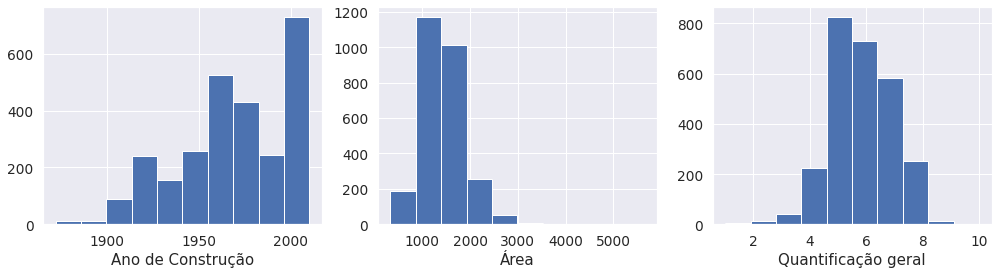

In [ ]:
#Vamos verificar os Outliers
fig, (ax,ax2,ax3) = plt.subplots(1,3, figsize=(17, 4))

houses['Year Built'].hist(ax=ax)
ax.set_xlabel('Ano de Construção')
houses['Gr Liv Area'].hist(ax=ax2)
ax2.set_xlabel('Área')
houses['Overall Qual'].hist(bins=10, ax=ax3)
ax3.set_xlabel('Quantificação geral')
plt.tight_layout;

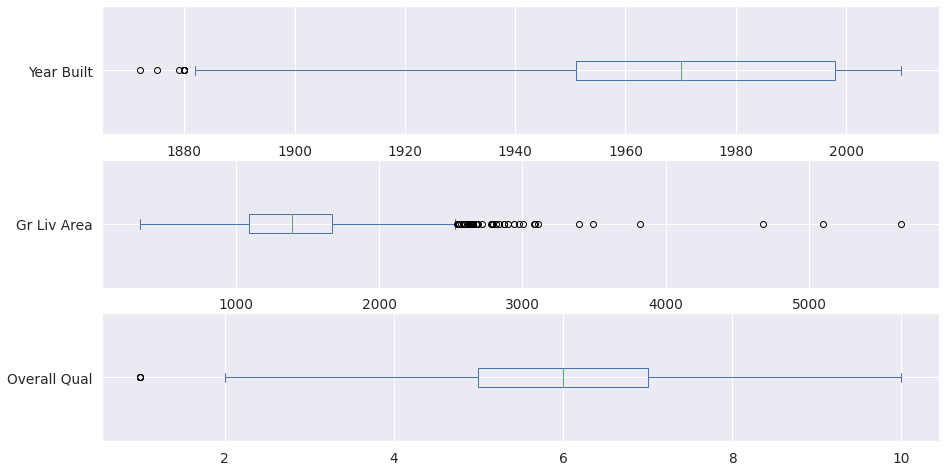

In [ ]:
#Vamos fazer a verificação de outliers de maneira mais eficiente com a ajuda dos boxplot
fig, (ax,ax2,ax3) = plt.subplots(3,1, figsize=(15, 8))
houses['Year Built'].plot(kind='box', vert=False, ax = ax)
houses['Gr Liv Area'].plot(kind='box', vert=False, ax = ax2)
houses['Overall Qual'].plot(kind='box', vert=False, ax = ax3)
plt.tight_layout;

Vamos fazer a limpeza dessa variaveis na qual vamos executar o nosso modelo de regressão

In [ ]:
df_copy.drop(df_copy[df_copy['Year Built'] <= 1940].index, axis=0, inplace=True)
df_copy.drop(df_copy[df_copy['Gr Liv Area'] > 2000].index, axis=0, inplace=True)
df_copy.drop(df_copy[df_copy['Overall Qual'] < 3].index, axis=0, inplace=True)
df_copy.drop(df_copy[df_copy['Overall Qual'] > 8].index, axis=0, inplace=True)

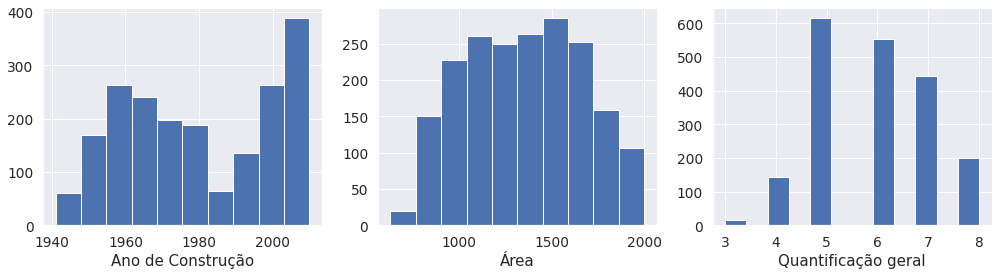

In [ ]:
fig, (ax,ax2,ax3) = plt.subplots(1,3, figsize=(17, 4))

df_copy['Year Built'].hist(ax=ax)
ax.set_xlabel('Ano de Construção')
df_copy['Gr Liv Area'].hist(ax=ax2)
ax2.set_xlabel('Área')
df_copy['Overall Qual'].hist(bins=12, ax=ax3)
ax3.set_xlabel('Quantificação geral')
plt.tight_layout;

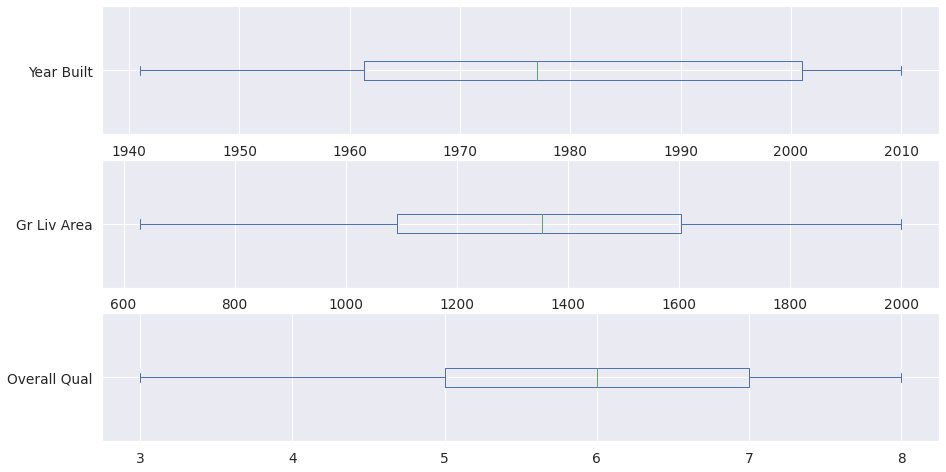

In [ ]:
fig, (ax,ax2,ax3) = plt.subplots(3,1, figsize=(15, 8))
df_copy['Year Built'].plot(kind='box', vert=False, ax = ax)
df_copy['Gr Liv Area'].plot(kind='box', vert=False, ax = ax2)
df_copy['Overall Qual'].plot(kind='box', vert=False, ax = ax3)
plt.tight_layout;

> Conseguimos observar que a maioria dos outliers sairam do nosso dataset

## **Regressão Linear**
* Implementar a Regressão Linear Multipla
* Escolher as melhores formas de medir o desempenho do modelo

In [ ]:
# Vamos fazer a importação das bibliotecas 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_copy.head() #Analisamos as primeiras 6 Entradas do nosso dataset

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500


Vamos Preparar o dataset em treino e teste


In [ ]:
# Vamos apagar as variáveis que não entraram no modelo de marchine learning, para assim conseguir separar o dataset
df_copy.drop(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 
       'Overall Cond', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF','Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition'], axis=1, inplace=True)

In [ ]:
df_copy # Logo após a limpeza das colunas que não serão utilizadas, vamos separar o dataset em Treino e Teste

,Overall Qual,Year Built,Gr Liv Area,SalePrice
0,6,1960,1656,215000
1,5,1961,896,105000
2,6,1958,1329,172000
4,5,1997,1629,189900
5,6,1998,1604,195500
...,...,...,...,...
2925,6,1984,1003,142500
2926,5,1983,902,131000
2927,5,1992,970,132000
2928,5,1974,1389,170000


In [ ]:
# Aqui será feita a separação da variaveis no eixo X e y
X = df_copy.drop('SalePrice', axis=1)
y = df_copy['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # O Train test split tem como função separar em treino e teste

In [ ]:
# Nesse passo iremos treinar o modelo de machine learning
rlm_model = LinearRegression()
rlm_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coeficiente:\t', rlm_model.coef_) 
print("Intercepto:\t", rlm_model.intercept_)

Coeficiente:	 [17745.04843706   498.53208474    51.92469366]
Intercepto:	 -996494.0183576193


In [ ]:
y_pred = rlm_model.predict(X_test)  # Iremos utilizar o método predict para assim fazer as previsões

### R2 Score
A Primeira métrica de avaliação se chama R2 Score, na qual fórmula se encontra abaixo, onde

coefficient_of_determination.svg





> * R^2	=	Coeficiente de determinação
> * RSS	=	Soma do quadrado dos resíduos
> * TSS	=	Soma total dos quadrados

### MAE : mean absolute error

mean_absolute_error.svg


* y_i	=	prediction
* x_i	=	true value
* n	=	total number of data points


### MSE: Mean squared error

mean_squared_error.svg

* n	=	number of data points
* Y	=	observed values
* Y^	=	predicted values

In [ ]:
print('R2 Score:\t', r2_score(y_test, y_pred))
print('MAE:\t\t', mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.7144452381399138
MAE:		 18809.387506329113
MSE:		 601197193.5318154
